In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
data_dirct='/content/drive/MyDrive/DS/DailyDelhiClimateTrain.csv'

In [44]:
data=pd.read_csv(data_dirct)

data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [45]:
data["date"] = pd.to_datetime(data["date"])

In [46]:
data = data.set_index("date").asfreq('D')

In [47]:
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


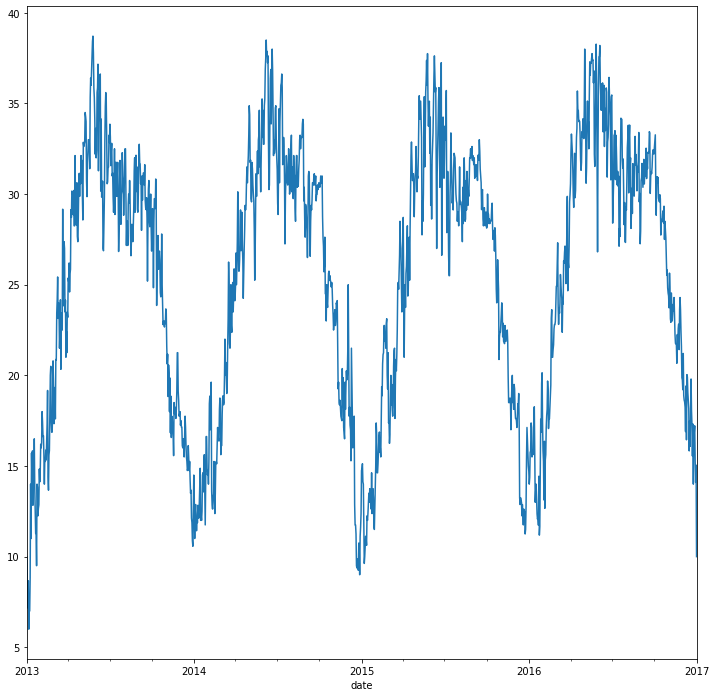

In [50]:
data = data["meantemp"]
data.plot(figsize=(12,12))

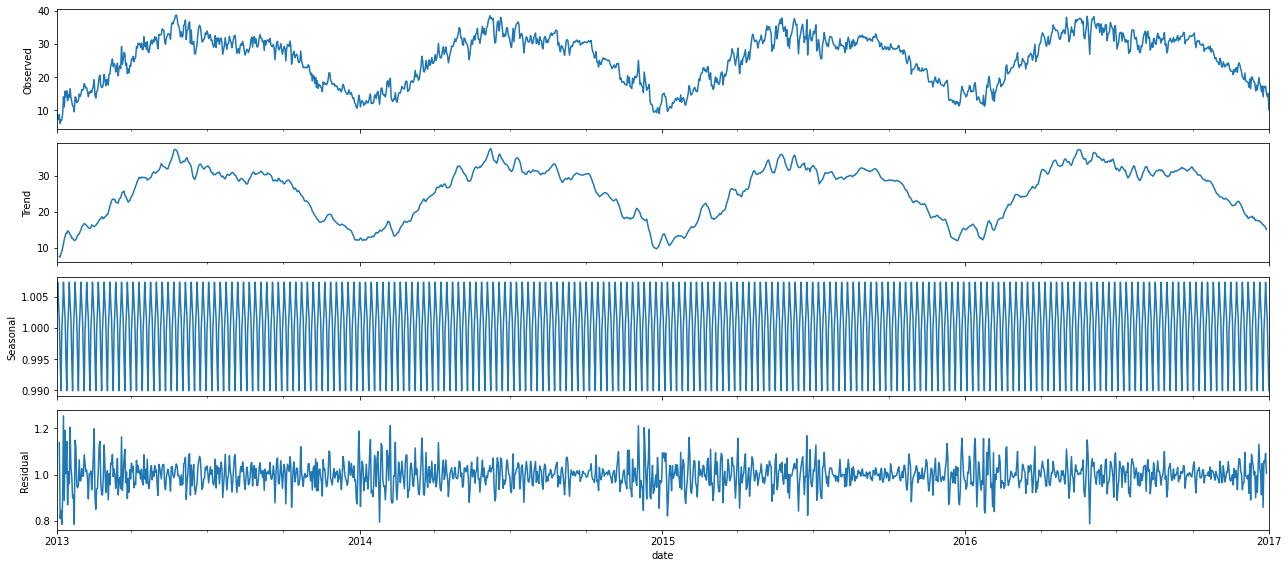

In [51]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize']=18,8
decompostion=sm.tsa.seasonal_decompose(data,model='multiplicative')
decompostion.plot()
plt.show()

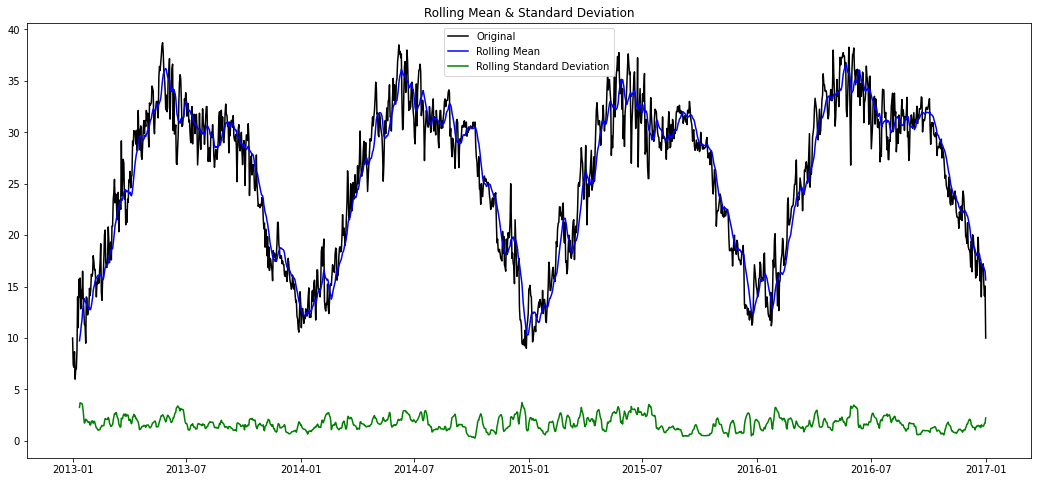

In [52]:
"""
    Graphical REpresentation of the Rolling Mean and Rolling Std. Deviation on the whole dataset
    This will some how help  in estimating the whether the dataset is Stationary or not.
"""
roll_mean=data.rolling(12).mean()
roll_std=data.rolling(12).std()
plt.plot(data, color='black',label='Original')
plt.plot(roll_mean,color="blue",label='Rolling Mean')
plt.plot(roll_std,color='green',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)



In [ ]:
# Basic Method to check the dataset
# X=data.values
# split=round(len(X)/2)
# X1=X[0:split]
# X2=X[split:]
# mean1,mean2=X1.mean(),X2.mean()
# var1,var2=X1.var(),X2.var()

In [ ]:
# print('mean1=%f, mean2=%f' % (mean1, mean2))
# print('variance1=%f, variance2=%f' % (var1, var2))

In [ ]:
# """
#     On Seeing the Mean and Varianceof the dataset it can be conffered that the Dataset is non-stationary
# """

In [53]:
#Using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dickey_test(data):
    X_dickey=data.values
    result = adfuller(X_dickey)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [54]:
dickey_test(data)

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [55]:
"""
    Here, ADF value is greater than the critical value
    SO NULL Hypothesis is accepted 
    i.e The Dataset is non-Stationary
"""

'\n    Here, ADF value is greater than the critical value\n    SO NULL Hypothesis is accepted \n    i.e The Dataset is non-Stationary\n'

ADF Statistic: -3.586512
p-value: 0.006024
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


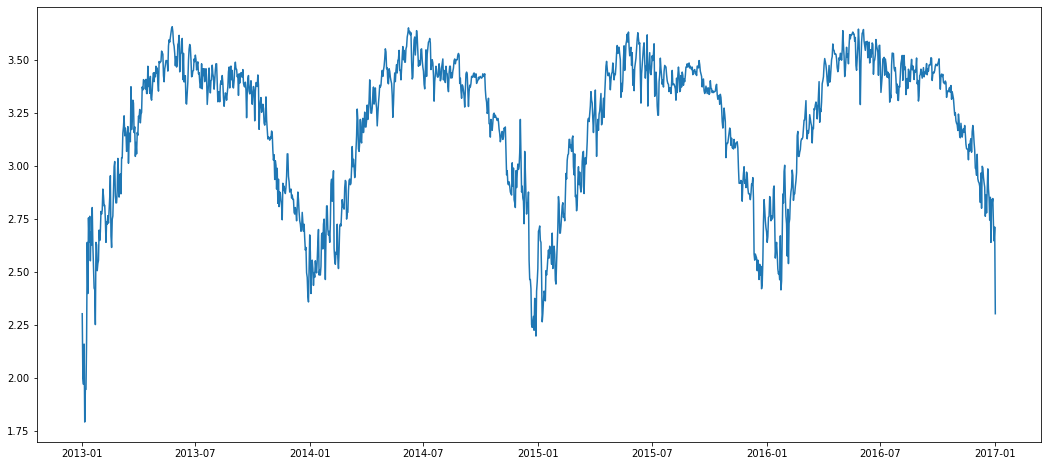

In [56]:
#Log Transforming the dataset to make it Stationary
import math
log_data=np.log(data)
# result = adfuller(X_dickey)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))
    
dickey_test(log_data)
plt.plot(log_data)

In [ ]:
"""
    Even after applying, the Log Tansform to the dataset
    The data appears to be in non-stationary form
"""

'\n    Even after applying, the Log Tansform to the dataset\n    The data appears to be in non-stationary form\n'

In [ ]:
# #Applying Manual Difference Transform to the data to make it Stationary
# def difference(dataset, interval=365):
#     diff=list()
#     for i in range(interval, len(dataset)):
#         value=dataset[i]-dataset[i-interval]
#         diff.append(value)
#         print(diff.append(value))
#     return diff
    
# def inverted(last_obsv, value):
#     return last_obsv+value

# diff=difference(data['RSCCASN'].values)
# print(diff)
# plt.plot(diff)
# plt.show()
# inverted=[inverted(data[i],diff[i]) for i in range(len(diff))]

# # print(inverted)

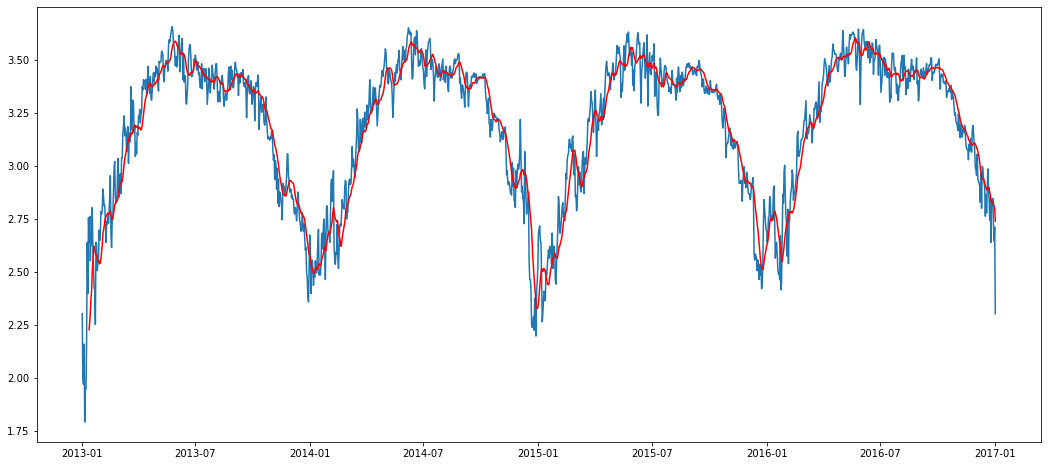

In [57]:
#Applying rolling mean to the log dataset
moving_average=log_data.rolling(window=12).mean()
plt.plot(log_data)
plt.plot(moving_average,color='red')

In [62]:
log_data_moving_average=log_data-moving_average
log_data_moving_average

date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2016-12-28    0.012768
2016-12-29   -0.097820
2016-12-30   -0.164786
2016-12-31   -0.084832
2017-01-01   -0.436875
Freq: D, Name: meantemp, Length: 1462, dtype: float64

In [63]:
log_data_moving_average.dropna( inplace=True)
dickey_test(log_data_moving_average)


ADF Statistic: -8.828078
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
"""
    After, Applying the rolling mean to the data
    Stationary Dataset is achieved
"""

'\n    After, Applying the rolling mean to the data\n    Stationary Dataset is achieved\n'

In [64]:
#Diffrence method to make the dataset staionary !!!! Most effective
#Also using this to remove further trends and seasonality
log_data_diff=log_data-log_data.shift()
log_data_diff

date
2013-01-01         NaN
2013-01-02   -0.301105
2013-01-03   -0.032039
2013-01-04    0.190044
2013-01-05   -0.367725
                ...   
2016-12-28    0.021569
2016-12-29   -0.122121
2016-12-30   -0.077962
2016-12-31    0.065716
2017-01-01   -0.408968
Freq: D, Name: meantemp, Length: 1462, dtype: float64

In [65]:
# #Method to remove the missing data from the dataset 
# nan_value=float("NaN")
# log_data_diff.replace(" ", nan_value, inplace=True)
# log_data_diff.dropna(subset = ["RSCCASN"], inplace=True)
log_data_diff.dropna( inplace=True)
dickey_test(log_data_diff)


ADF Statistic: -20.887532
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


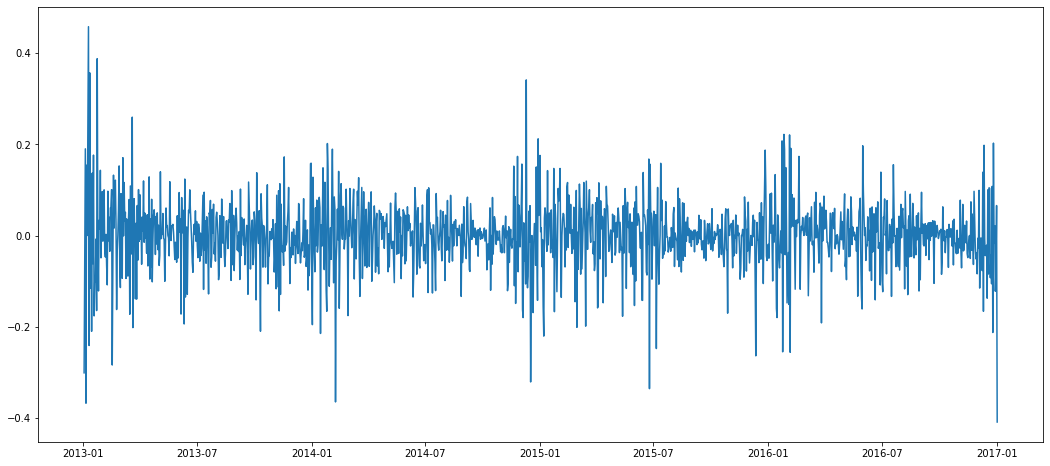

In [66]:
plt.plot(log_data_diff)

In [ ]:
"""
    After, Applying the Diffrence to the data
    Stationary Dataset is achieved
"""

'\n    After, Applying the Diffrence to the data\n    Stationary Dataset is achieved\n'

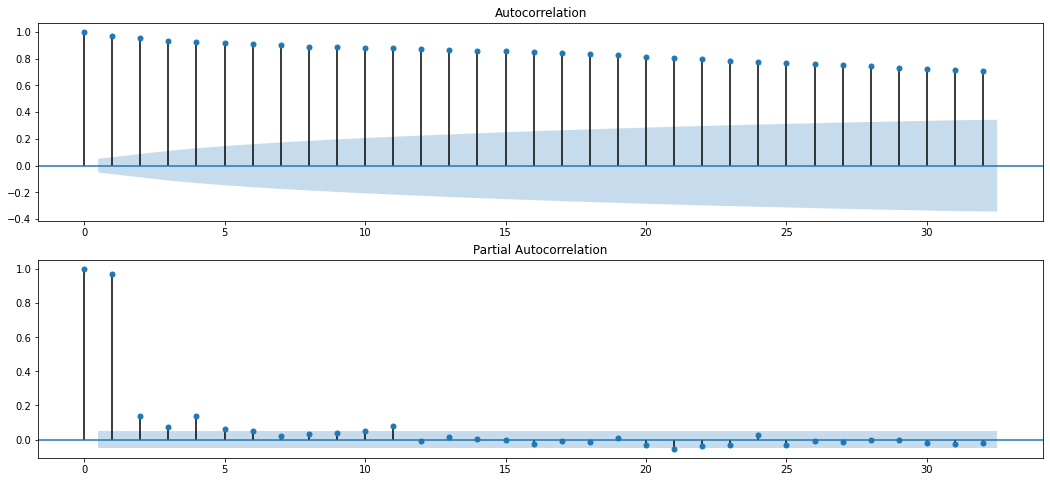

In [67]:
#Plotting the ACF and PACF graph 
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data,  ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data, ax=ax[1], method='ywm' )
plt.show()



Optimization terminated successfully.
         Current function value: 1.892952
         Iterations: 7
         Function evaluations: 356


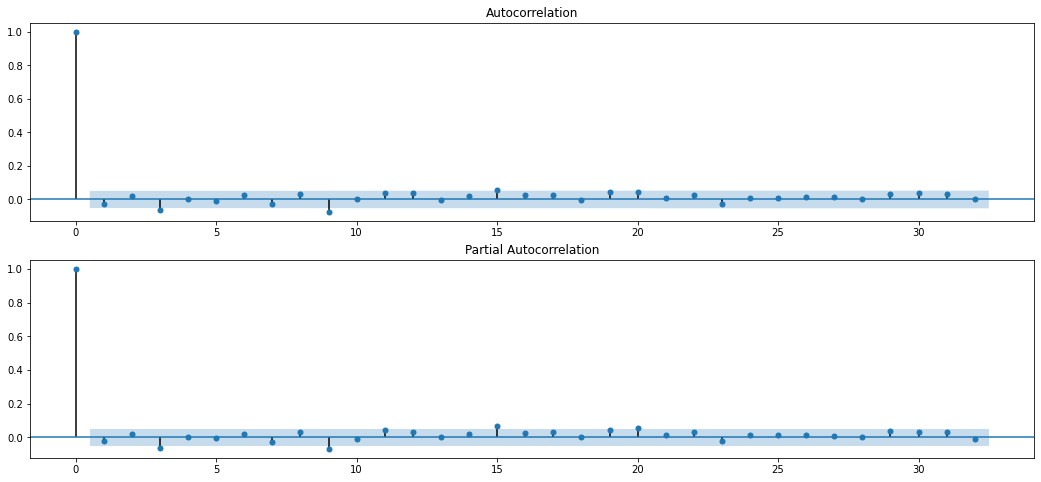

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                 1462
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 36)   Log Likelihood               -2767.496
Date:                            Tue, 29 Mar 2022   AIC                           5542.992
Time:                                    15:32:13   BIC                           5564.040
Sample:                                01-01-2013   HQIC                          5550.853
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5716      0.048     11.793      0.000       0.477       0.667
ma.L1         -0.8012      0.038    -20.970      0.000      -0.876      -0.726
ma.S.L36      -0.9998      3.763     -0.266      0.790      -8.376       6.376
sigma2         2.5929      9.727      0.267      0.790     -16.471      21.657
===================================================================================
Ljung-Box (Q):                       72.66   Jarque-Bera (JB):               197.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.48
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
import warnings
warnings.filterwarnings("ignore")
"""
    Intiating the Sarima model on the parameters estimated by seeing the 
    ACF and PACF plot
"""
model=sm.tsa.statespace.SARIMAX(data,order=(1,1,1),seasonal_order=(0,1,1,36)).fit(max_iter=50,method="powell")

res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, ax=ax[1])
plt.show()
model.summary()

In [69]:
print(model.aic)

5542.992106276717


In [70]:
"""

    Using GridSerachCV to find the optimized parameters for the 
    SARIMA Model
    
    Various parameters will be used to made the model and the model 
    with the lowest AIC(Akaike’s Information Criterion )
    will be selected for its parameter


"""

import itertools
import warnings
warnings.filterwarnings("ignore")
#set parampandasrange
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(36,37)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))

seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(data,
                                    order=param,
                                    seasonal_order=param_seasonal)
        
            results = mod.fit(max_iter = 50, method = 'powell')
            
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 1.913542
         Iterations: 3
         Function evaluations: 117
SARIMA(0, 1, 1),(0, 1, 1, 36) - AIC:5601.196921977988
Optimization terminated successfully.
         Current function value: 1.913196
         Iterations: 3
         Function evaluations: 150
SARIMA(0, 1, 1),(0, 1, 2, 36) - AIC:5602.186338382977
Optimization terminated successfully.
         Current function value: 1.913150
         Iterations: 4
         Function evaluations: 196
SARIMA(0, 1, 1),(1, 1, 1, 36) - AIC:5602.050220108846
Optimization terminated successfully.
         Current function value: 1.913422
         Iterations: 3
         Function evaluations: 191
SARIMA(0, 1, 1),(1, 1, 2, 36) - AIC:5604.846889968665
Optimization terminated successfully.
         Current function value: 1.913236
         Iterations: 6
         Function evaluations: 382
SARIMA(0, 1, 1),(2, 1, 1, 36) - AIC:5604.303237439044
Optimization terminated successfully.
  

In [ ]:
"""
    On applying Grid Search Cv
    The parameter with lowest AIC(Akaike information criterion) is considered optimal
    In my case it is (2,1,2)(2,1,2,36)

"""

'\n    On applying Grid Search Cv\n    The parameter with lowest AIC(Akaike information criterion) is considered optimal\n    In my case it is (2,1,2)(2,1,2,36)\n\n'

In [71]:
n_test=20
test_ind=len(data)-n_test
train, test = data[:test_ind], data[test_ind:]

In [ ]:
# fit SARIMA based on Grid Search CV hypertune
train2=data.copy()

sar = sm.tsa.statespace.SARIMAX(np.log(train), 
                                order=(2,1,2), 
                                seasonal_order=(2,1,2,36)).fit(max_iter = 50, method = 'powell')
sar.summary()

In [ ]:
"""
    ACF and PACF correlation is miniized with the help of
    optimized parameters
"""
res = sar.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
ax[0].set_xlim(0, 52)
ax[1].set_xlim(0, 52)
plt.show()

In [ ]:
def unlog_pred(log_pred):
    
    pred = [math.exp(i) for i in log_pred.values]
    pred = pd.Series(pred, index = log_pred.index)
    
    return pred
pred_forecast_log = sar.get_forecast(steps = 20)
# pred_uc_ci = pred_forecast_log.conf_int(alpha=0.05)
pred_forecast = unlog_pred(pred_forecast_log.predicted_mean)

test['Prediction']=pred_forecast

In [ ]:
test

In [ ]:
true_value=test['RSCCASN'].values
forcast=pred_forecast.values
mse_score = ((forcast- true_value) ** 2).mean()
print('MSE of our forecasts is {}'.format(round(mse_score, 3)))
rmse = math.sqrt(mse_score)
print("RMSE-Value" ,rmse)

In [ ]:
mape = (abs(forcast-true_value)/true_value)*100
mape.mean()

In [ ]:
forecast_index=pd.date_range(start='2017-05-01',periods=n_test,freq="MS")
forecast_index
pred_forecast=pd.DataFrame(data=pred_forecast,index=forecast_index,columns=['Forecast'])


In [ ]:
ax=data.plot()
pred_forecast.plot(ax=ax,label='Predicted')

In [ ]:
"""
    The SARIMAX model seems to be working good
    
    The model is able to pickup the trends which wasn't able to be picked by 
    previous LTSM model which can be found in the Repo

"""

In [ ]:
"""
    
    Verifing the model performance with the help of 
    Walk_forward_Validation method
    
    This model Mean Absolute Error and Mean Absolute Percent Error 
    and GridSearchCV Mean Absolute Error and Mean Absolute Percent Error
    will be compared.
    
    
    The one with the lowest MAPE will be selected for the future prediction
    which are not in the dataset

"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")
entire_dataset=np.log(data.values)
n_test=20
def walk_forward_validation(data, n_test):  
    predictions =[]
    log_predictions=[]
    mape_list = []
    test_ind=len(data)-n_test
    train, test = data[:test_ind], data[test_ind:]  
    train,test=train_test_split(data,test_size=n_test)
    history=[x for x in data]
        
    for i in range(len(test)):
        
        
        # Fit model to training data
        model=sm.tsa.statespace.SARIMAX(history,order=(2,1,2),seasonal_order=(2,1,2,36)).fit(max_iter=50,method="powell")

        
        # Forecast daily loads for week i
        forecast = model.predict(len(history),len(history))
        output=forecast[0]
        predictions.append(forecast)      
        #Calculate MAPE and add to mape_list
        obs=test[i]
        print('predicted=%f, expected=%f' % (output, obs))
        history.append(obs)
        
#     #Calculate MAPE and add to mape_list   
# #     pred_forecast = unlog_pred(log_predictions.predicted_mean)
# #     predictions.append(pred_forecast)
    
            

   
# #     true_value=np.exp(test.values)
# #     forcast=pred_forecast.values
#     print('predicted=%f, expected=%f' % (pred, true_value))
        
#     mape = (abs(forcast-true_value)/true_value)*100
#     mape_list.append(mape)
        
    
    error = mean_squared_error(test, predictions)
    rmse = mean_squared_error(test, predictions)**0.5
        
    return predictions,error,rmse

In [ ]:
preddictions,error,rmse=walk_forward_validation(entire_dataset,n_test=n_test)

In [ ]:
print(preddictions)


In [ ]:
print('Test MSE: %.3f' % rmse)

In [ ]:
test_ind=len(entire_dataset)-n_test
# train, test = data[:test_ind], entire_dataset[test_ind:]  
train,test=train_test_split(entire_dataset,test_size=n_test)


In [ ]:
predictions = pd.Series(preddictions, copy=True)
predictions=predictions.values.reshape(predictions.shape[0],-1)
predictions.shape

In [ ]:
plt.plot(preddictions)
plt.plot(test)

In [ ]:
true_value=test
forcast=predictions

In [ ]:
mape = (abs(forcast-true_value)/true_value)*100
mape.mean()

In [ ]:
"""
    The Mean Absolute Error and Mean Absolute Percent Error of both the Grid Search CV 
    and the Walk_forward_validation model came out to be: 3.391
    
    SO, any of the model can be used
"""


######################NOTE################################################3

"""
    The predictions made through the Walk_Forward_Validation 
    are still in log form.
    
    
    They needed to transformed to show better graphical relation
    
    I having some data issues will update it soon


"""





'\n    The predictions made through the Walk_Forward_Validation \n    are still in log form.\n    \n    \n    They needed to transformed to show better graphical relation\n    \n    I having some data issues will update it soon\n\n\n'

In [ ]:
"""
    Future Time Casting sar model
"""

sar_forcaster=sm.tsa.statespace.SARIMAX(np.log(data.RSCCASN), 
                                order=(2,1,2), 
                                seasonal_order=(2,1,2,36)).fit(max_iter = 50, method = 'powell')
sar_forcaster.summary()

In [ ]:
pred_forecast_log = sar_forcaster.get_forecast(steps = 30)
pred_forecast = unlog_pred(pred_forecast_log.predicted_mean)

In [ ]:
print(pred_forecast)

In [ ]:
forecaster_index=pd.date_range(start='2019-01-01',periods=n_test,freq="MS")
forecaster_index
pred_forecast=pd.DataFrame(data=pred_forecast,index=forecaster_index,columns=['Forecast'])


In [ ]:
ax=data.plot()
pred_forecast.plot(ax=ax)


In [ ]:
"""
    Seems that model get the trend
"""


'\n    Seems that model get the trend\n'